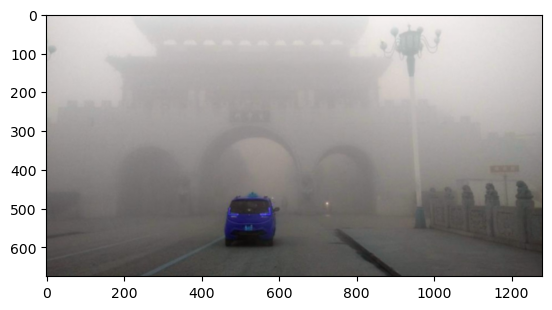

300
(300, 32, 32, 3)
(300, 32, 32, 3)
Epoch 1/10


ValueError: in user code:

    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\HP\anaconda3\lib\site-packages\keras\losses.py", line 1486, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 24 and 32 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_2/conv2d_8/Sigmoid, IteratorGetNext:1)' with input shapes: [30,24,24,3], [30,32,32,3].


In [8]:
import os
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


def build_cnn_model(target_size, num_channels):
    model = models.Sequential()
    # Define your CNN model architecture
    
    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, num_channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    # Add more convolutional layers as needed
    
    # Upsampling layers
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2D(num_channels, (3, 3), activation='sigmoid', padding='same'))  # Output with 3 channels (RGB)
    
    return model


def preprocess_image(image, target_size):
    # Resize the image to the target size
    image_resized = cv2.resize(image, (target_size, target_size))

    # Perform any other preprocessing steps as needed
    # ...

    return image_resized


def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
    return images

def preprocess_images(images, target_size):
    preprocessed_images = []
    for image in images:
        preprocessed_image = preprocess_image(image, target_size)
        preprocessed_images.append(preprocessed_image)

    # Check if all preprocessed images have the same shape
    shapes = set([image.shape for image in preprocessed_images])
    if len(shapes) > 1:
        raise ValueError("All preprocessed images must have the same shape")

    # Convert the list of preprocessed images to a NumPy array
    preprocessed_images = np.array(preprocessed_images)
    return preprocessed_images

"""
def self_supervised_train(train_data, num_epochs, batch_size):
    input_shape = train_data.shape[1:]
    model = build_cnn_model(input_shape)
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size)
    return model

def self_supervised_train(train_data, num_epochs, batch_size):
    # Reshape the input data to have shape (num_samples, height, width, num_channels)
    train_data = train_data.reshape(-1, train_data.shape[1], train_data.shape[2], train_data.shape[3])

    # Build and compile the CNN model
    input_shape = (train_data.shape[1], train_data.shape[2], train_data.shape[3])
    model = build_cnn_model(input_shape)
    model.compile(optimizer='adam', loss='mse')

    print(train_data.shape)
    # Train the CNN model using self-supervised learning
    model.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size)

    return model
"""
def self_supervised_train(train_data, num_epochs, batch_size):
    # Build and compile the CNN model
    target_size = train_data.shape[1]
    num_channels = train_data.shape[3]
    model = build_cnn_model(target_size, num_channels)
    model.compile(optimizer='adam', loss='mse')

    # Reshape the input data to have shape (num_samples, target_size, target_size, num_channels)
    train_data = train_data.reshape(-1, target_size, target_size, num_channels)

    # Train the CNN model using self-supervised learning
    model.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size, verbose=1)
    

    return model

if __name__ == '__main__':
    folder_path = "C:/Users/HP/Documents/Semester (summer)/Aim Lab Internship/Fog"  # Specify the folder path containing the foggy images
    foggy_images = load_images_from_folder(folder_path)
    import matplotlib.pyplot as plt
    # Display one of the foggy images
    plt.imshow(foggy_images[0])
    plt.show()
    print(len(foggy_images))  # Print the number of images loaded
    target_size = 32  # Specify the desired target size for preprocessing
    preprocessed_images = preprocess_images(foggy_images, target_size)
    print(preprocessed_images.shape)  # Print the shape of the preprocessed images

    # Normalize pixel values to [0, 1]
    preprocessed_images = preprocessed_images.astype('float32') / 255.0

    # Train the CNN using self-supervised learning
    print(preprocessed_images.shape)
    model = self_supervised_train(preprocessed_images, num_epochs=10, batch_size=30)

    # Now you can use the trained model for fog removal on new foggy images
    # Assuming you have a new foggy image: foggy_image_path
    foggy_image_path = "C:/Users/HP/Documents/Semester (summer)/Aim Lab Internship/Fog/foggy-001.jpg"
    foggy_image = cv2.imread(foggy_image_path)
    preprocessed_foggy_image = preprocess_image(foggy_image, target_size)
    normalized_foggy_image = preprocessed_foggy_image.astype('float32') / 255.0
    dehazed_image = model.predict(np.expand_dims(normalized_foggy_image, axis=0))[0]

    # Display the dehazed image
    plt.imshow(dehazed_image)
    plt.show()

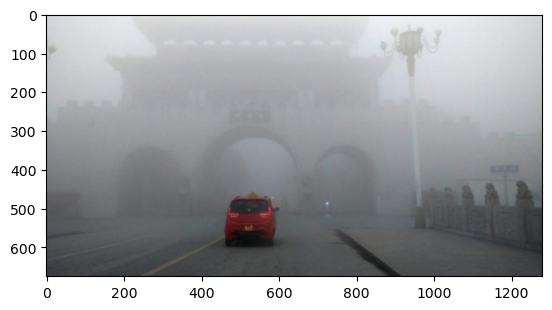

300


ValueError: 'images' must have either 3 or 4 dimensions.

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image

def build_cnn_model(target_size, num_channels):
    model = models.Sequential()
    # Define your CNN model architecture
    
    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, num_channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    # Add more convolutional layers as needed
    
    # Upsampling layers
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2D(num_channels, (3, 3), activation='sigmoid', padding='same'))  # Output with 3 channels (RGB)
    
    return model


def preprocess_image(image, target_size):
    # Resize the image to the target size
    image_resized = tf.image.resize(image, (target_size, target_size))

    # Normalize pixel values to [-1, 1]
    image_normalized = (tf.cast(image_resized, tf.float32) / 127.5) - 1.0
    
    return image_normalized


def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                images.append(np.array(img))
    return images


def self_supervised_train(train_data, num_epochs, batch_size):
    # Build and compile the CNN model
    target_size = train_data.shape[1]
    num_channels = train_data.shape[3]
    model = build_cnn_model(target_size, num_channels)
    model.compile(optimizer='adam', loss='mse')

    # Train the CNN model using self-supervised learning
    model.fit(train_data, train_data, epochs=num_epochs, batch_size=batch_size)

    return model


if __name__ == '__main__':
    folder_path = "C:/Users/HP/Documents/Semester (summer)/Aim Lab Internship/Fog"  # Specify the folder path containing the foggy images
    foggy_images = load_images_from_folder(folder_path)

    # Display one of the foggy images
    plt.imshow(foggy_images[0])
    plt.show()

    print(len(foggy_images))  # Print the number of images loaded

    target_size = 32  # Specify the desired target size for preprocessing
    preprocessed_images = []
    for image in foggy_images:
        preprocessed_image = preprocess_image(image, target_size)
        preprocessed_images.append(preprocessed_image)

    # Check if all preprocessed images have the same shape
    shapes = set([image.shape for image in preprocessed_images])
    if len(shapes) > 1:
        raise ValueError("All preprocessed images must have the same shape")

    # Convert the list of preprocessed images to a NumPy array
    preprocessed_images = np.array(preprocessed_images)
    print(preprocessed_images.shape)  # Print the shape of the preprocessed images

    # Train the CNN using self-supervised learning
    model = self_supervised_train(preprocessed_images, num_epochs=10, batch_size=30)

    # Now you can use the trained model for fog removal on new foggy images
    foggy_image_path = "C:/Users/HP/Documents/Semester (summer)/Aim Lab Internship/Fog/foggy-001.jpg"
    # Assuming you have a new foggy image: foggy_image_path
    with Image.open(foggy_image_path) as img:
        foggy_image = np.array(img)
    preprocessed_foggy_image = preprocess_image(foggy_image, target_size)
    dehazed_image = model.predict(np.expand_dims(preprocessed_foggy_image, axis=0))
    dehazed_image = ((dehazed_image[0] + 1) * 127.5).astype(np.uint8)
    plt.imshow(dehazed_image)
    plt.show()